# Strategy Evaluation Stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Assignment#1_Performance_track_records_Fall2019_out.csv')

In [3]:
data.head()

,Asset,DateTime,Price_Close,03_01,03_02,03_03,03_04,03_05,03_06,03_07,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
0,XAU/USD,1/1/2014 17:00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,XAU/USD,1/2/2014 17:00,1224.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,XAU/USD,1/3/2014 17:00,1237.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,XAU/USD,1/6/2014 17:00,1238.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000899,0.000000,0.0,0.0
4,XAU/USD,1/7/2014 17:00,1232.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.005002,-0.006569,0.0,0.0


In [4]:
return_data = data.iloc[:, 3:]

In [5]:
cum_return_data = (return_data + 1).cumprod()

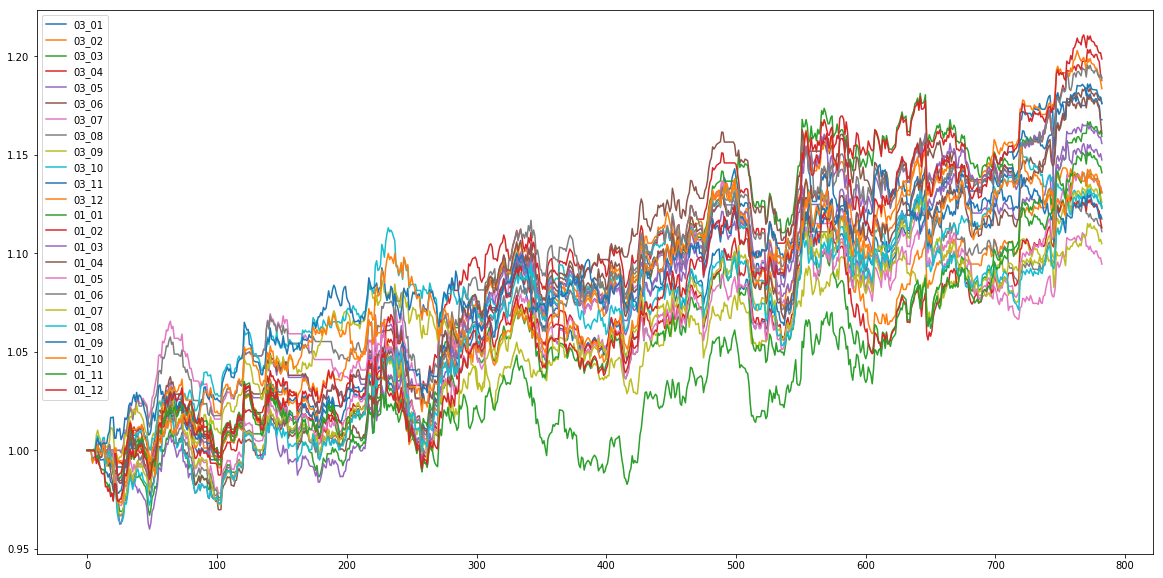

In [6]:
fig = plt.figure(figsize=(20, 10))
plt.plot(cum_return_data)
plt.legend(return_data.columns)
plt.show()

In [7]:
def annual_return(ret_df):
    ann = pow(pd.DataFrame((ret_df + 1).cumprod().iloc[-1, :]).T, 252/ret_df.shape[0])-1
    ann.index = ['Annual Return']
    return ann

In [8]:
annual_return(data.iloc[:, 3:])

,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,03_10,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
Annual Return,0.051209,0.040306,0.048736,0.057346,0.047698,0.053573,0.029498,0.034467,0.032629,0.037962,...,0.045251,0.04915,0.040412,0.056931,0.038916,0.03803,0.036399,0.040424,0.043356,0.060066


In [9]:
def annual_volatility(ret_df):
    std = pd.DataFrame(ret_df.std()).T*np.sqrt(252)
    std.index = ['Annual Volatility']
    return std

In [10]:
annual_volatility(data.iloc[:, 3:])

,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,03_10,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
Annual Volatility,0.055101,0.055557,0.059084,0.055572,0.054361,0.05384,0.054016,0.053274,0.052442,0.05491,...,0.063891,0.061429,0.062841,0.060851,0.062553,0.062224,0.056129,0.061088,0.061248,0.058987


In [11]:
def sharpe_ratio(ret_df, rf):
    exc_ret = np.array(annual_return(ret_df)) - np.array([rf]*ret_df.shape[1])
    std = np.array(annual_volatility(ret_df))
    sr = pd.DataFrame(exc_ret / std)
    sr.columns = ret_df.columns
    sr.index = ['Sharpe Ratio']
    return sr

In [12]:
sharpe_ratio(data.iloc[:, 3:], 1.58/100)

,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,03_10,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
Sharpe Ratio,0.642619,0.441097,0.557438,0.747611,0.586791,0.701584,0.25359,0.350401,0.3209,0.403598,...,0.460962,0.542912,0.391653,0.675932,0.369539,0.357265,0.366993,0.403086,0.449912,0.750436


In [13]:
def max_drawdown(ret_df):
    cum = (ret_df + 1).cumprod()
    max_list = []
    for i in range(cum.shape[1]):
        series = np.array(cum.iloc[:, i])
        record = []
        for j in range(len(series)-1):
            record.append(series[j+1:].min()/series[j] - 1)
        max_list.append(np.array(record).min())
    max_df = abs(pd.DataFrame(max_list).T)
    max_df.columns = ret_df.columns
    max_df.index = ['Max Drawdown']
    return max_df

In [14]:
max_drawdown(data.iloc[:, 3:])

,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,03_10,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
Max Drawdown,0.164102,0.140353,0.181335,0.179515,0.156408,0.169436,0.120415,0.118581,0.107308,0.147788,...,0.181426,0.178056,0.148465,0.191335,0.147793,0.149087,0.121949,0.15674,0.154034,0.195637


In [16]:
def Sortino_Ratio(ret_df, rf):
    ret_new = ret_df.where(ret_df>0)
    exc_ret = np.array(annual_return(ret_df)) - np.array([rf]*ret_df.shape[1])
    std = np.array(ret_new.std())*np.sqrt(252)
    sortino = pd.DataFrame(exc_ret / std)
    sortino.columns = ret_df.columns
    sortino.index = ['Sortino Ratio']
    return sortino

In [17]:
Sortino_Ratio(data.iloc[:, 3:], 1.58/100)

,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,03_10,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
Sortino Ratio,0.862542,0.581849,0.751983,0.950771,0.723582,0.870672,0.316587,0.430301,0.426169,0.569653,...,0.67009,0.738473,0.561019,0.951767,0.523856,0.502143,0.532589,0.624985,0.636726,1.04691


In [18]:
def win_ratio(ret_df):
    ret_new = ret_df.where(ret_df>0)
    ratio = []
    for i in range(ret_new.shape[1]):
        ratio.append(len(ret_new.iloc[:, i].dropna())/ret_new.shape[0])
    ratio = pd.DataFrame(ratio).T
    ratio.columns = ret_df.columns
    ratio.index = ['Win Ratio']
    return ratio

In [19]:
win_ratio(data.iloc[:, 3:])

,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,03_10,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
Win Ratio,0.458493,0.449553,0.452107,0.449553,0.418902,0.422733,0.401022,0.408685,0.453384,0.461047,...,0.507024,0.505747,0.50447,0.50447,0.492976,0.492976,0.499361,0.507024,0.499361,0.50447


In [20]:
def Calmar_Ratio(ret_df):
    ret = np.array(annual_return(ret_df))
    drawdown = np.array(max_drawdown(ret_df))
    calmar = pd.DataFrame(ret / drawdown)
    calmar.columns = ret_df.columns
    calmar.index = ['Calmar Ratio']
    return calmar

In [21]:
Calmar_Ratio(data.iloc[:, 3:])

,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,03_10,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
Calmar Ratio,0.312055,0.287175,0.268762,0.319451,0.304961,0.316186,0.244969,0.290664,0.304065,0.256864,...,0.249419,0.27604,0.272199,0.297548,0.263312,0.255089,0.298475,0.257901,0.28147,0.307027


In [22]:
def IR(ret_df, market_df):
    diff = pd.DataFrame(np.array(ret_df.iloc[2:,:]) - np.array(pd.concat([market_df]*ret_df.shape[1], axis = 1)))
    std = np.array(diff.std())*np.sqrt(252)
    exp_ret = np.array(annual_return(ret_df))
    mar_ret = pow((market_df + 1).cumprod().iloc[-1], 252/market_df.shape[0]) - 1
    ir = pd.DataFrame((exp_ret - np.array([mar_ret]*len(exp_ret))) / std)
    ir.columns = ret_df.columns
    ir.index = ['IR']
    return ir

In [23]:
IR(data.iloc[:, 3:], data.iloc[1:, 2].pct_change().dropna())

,03_01,03_02,03_03,03_04,03_05,03_06,03_07,03_08,03_09,03_10,...,01_03,01_04,01_05,01_06,01_07,01_08,01_09,01_10,01_11,01_12
IR,0.465321,0.391024,0.446967,0.502439,0.455525,0.498295,0.32634,0.366951,0.337253,0.364229,...,0.416412,0.440822,0.38982,0.501959,0.378487,0.376826,0.358557,0.375006,0.394926,0.509723


In [24]:
def report(ret_df, rf, market_df):
    AR = annual_return(ret_df)
    AV = annual_volatility(ret_df)
    SR = sharpe_ratio(ret_df, rf)
    ST = Sortino_Ratio(ret_df, rf)
    CM = Calmar_Ratio(ret_df)
    ir = IR(ret_df, market_df)
    MD = max_drawdown(ret_df)
    WIN = win_ratio(ret_df)
    result = pd.concat([AR, AV, SR, ST, CM, ir, MD, WIN], axis = 0).T
    return result

In [25]:
rep = report(data.iloc[:, 3:], 1.58/100, data.iloc[1:, 2].pct_change().dropna())

In [26]:
rep.columns

Index(['Annual Return', 'Annual Volatility', 'Sharpe Ratio', 'Sortino Ratio',
       'Calmar Ratio', 'IR', 'Max Drawdown', 'Win Ratio'],
      dtype='object')

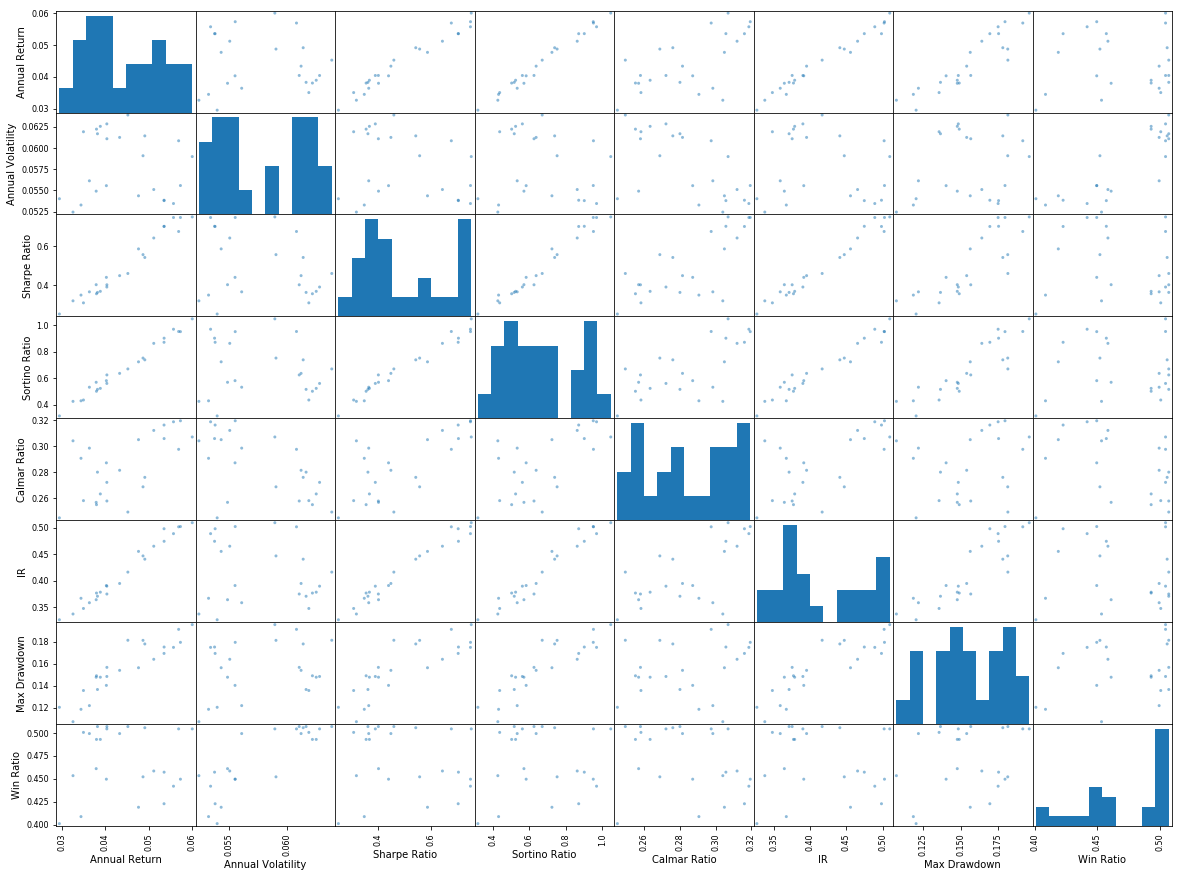

In [27]:
from pandas.plotting import scatter_matrix
attributes = ['Annual Return', 'Annual Volatility', 'Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio', 'IR', 'Max Drawdown', 'Win Ratio']
scatter_matrix(rep[attributes], figsize=(20, 15), alpha = 0.5)
plt.show()

In [28]:
rep

,Annual Return,Annual Volatility,Sharpe Ratio,Sortino Ratio,Calmar Ratio,IR,Max Drawdown,Win Ratio
03_01,0.051209,0.055101,0.642619,0.862542,0.312055,0.465321,0.164102,0.458493
03_02,0.040306,0.055557,0.441097,0.581849,0.287175,0.391024,0.140353,0.449553
03_03,0.048736,0.059084,0.557438,0.751983,0.268762,0.446967,0.181335,0.452107
03_04,0.057346,0.055572,0.747611,0.950771,0.319451,0.502439,0.179515,0.449553
03_05,0.047698,0.054361,0.586791,0.723582,0.304961,0.455525,0.156408,0.418902
03_06,0.053573,0.053840,0.701584,0.870672,0.316186,0.498295,0.169436,0.422733
03_07,0.029498,0.054016,0.253590,0.316587,0.244969,0.326340,0.120415,0.401022
03_08,0.034467,0.053274,0.350401,0.430301,0.290664,0.366951,0.118581,0.408685
03_09,0.032629,0.052442,0.320900,0.426169,0.304065,0.337253,0.107308,0.453384
03_10,0.037962,0.054910,0.403598,0.569653,0.256864,0.364229,0.147788,0.461047


In [29]:
select = ['03_07', '01_10', '01_04', '03_01', '01_12']
rep.loc[select]

,Annual Return,Annual Volatility,Sharpe Ratio,Sortino Ratio,Calmar Ratio,IR,Max Drawdown,Win Ratio
03_07,0.029498,0.054016,0.253590,0.316587,0.244969,0.326340,0.120415,0.401022
01_10,0.040424,0.061088,0.403086,0.624985,0.257901,0.375006,0.156740,0.507024
01_04,0.049150,0.061429,0.542912,0.738473,0.276040,0.440822,0.178056,0.505747
03_01,0.051209,0.055101,0.642619,0.862542,0.312055,0.465321,0.164102,0.458493
01_12,0.060066,0.058987,0.750436,1.046910,0.307027,0.509723,0.195637,0.504470


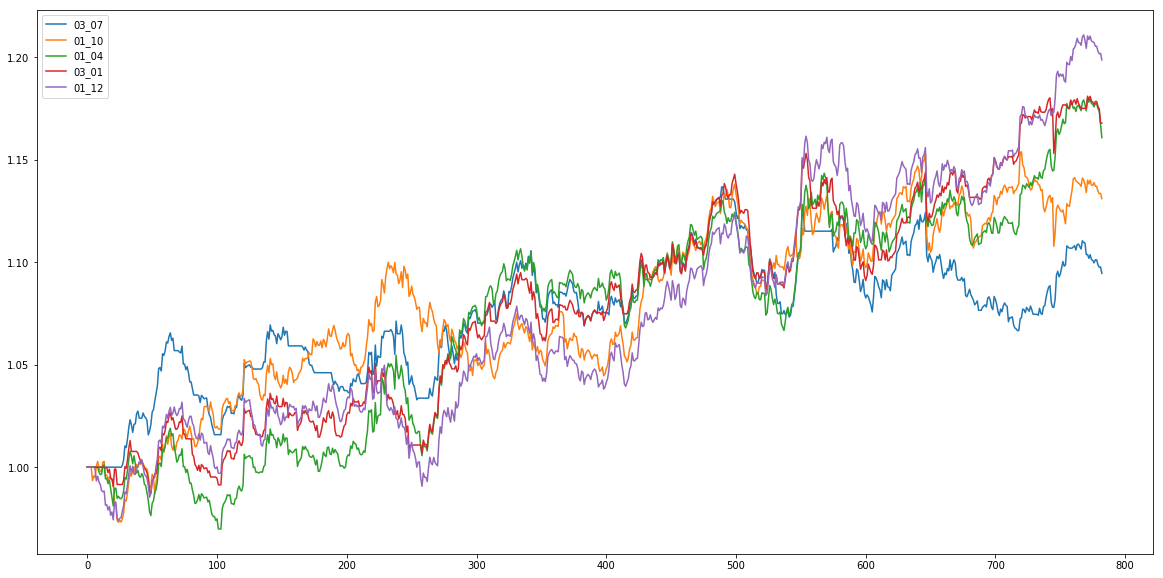

In [30]:
fig = plt.figure(figsize=(20, 10))
plt.plot(cum_return_data[select])
plt.legend(select)
plt.show()

In [31]:
def moving_window_stats(ret_df, rf, market_df):
    AR_list = []
    AV_list = []
    SR_list = []
    ST_list = []
    CM_list = []
    ir_list = []
    MD_list = []
    WIN_list = []
    for i in range(ret_df.shape[0] - 254):
        ret_new = ret_df.iloc[i:i+254, :]
        market_new = market_df.iloc[i: i + 252]
        
        AR_list.append(annual_return(ret_new))
        AV_list.append(annual_volatility(ret_new))
        SR_list.append(sharpe_ratio(ret_new, rf))
        ST_list.append(Sortino_Ratio(ret_new, rf))
        CM_list.append(Calmar_Ratio(ret_new))
        ir_list.append(IR(ret_new, market_new))
        MD_list.append(max_drawdown(ret_new))
        WIN_list.append(win_ratio(ret_new))
    
    AR_df = pd.concat(AR_list, axis = 0)
    AV_df = pd.concat(AV_list, axis = 0)
    SR_df = pd.concat(SR_list, axis = 0)
    ST_df = pd.concat(ST_list, axis = 0)
    CM_df = pd.concat(CM_list, axis = 0)
    ir_df = pd.concat(ir_list, axis = 0)
    MD_df = pd.concat(MD_list, axis = 0)
    WIN_df = pd.concat(WIN_list, axis = 0)
    return AR_df, AV_df, SR_df, ST_df, CM_df, ir_df, MD_df, WIN_df

In [32]:
AR_df, AV_df, SR_df, ST_df, CM_df, ir_df, MD_df, WIN_df = moving_window_stats(data.iloc[:, 3:], 1.58/100, data.iloc[1:, 2].pct_change().dropna())

In [33]:
def plot_box(result_df, stats_name):
    df_list = []
    for i in range(result_df.shape[1]):
        df_list.append(np.array(result_df.iloc[:,i]))
    
    fig = plt.figure(figsize=(20, 10))
    bplot = plt.boxplot(df_list, patch_artist = True, labels = result_df.columns)
    plt.title(stats_name + ' box plot')

    colors = ['pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink',
              'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue',
              'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)  

    plt.xlabel('24 Strategies')
    plt.ylabel(stats_name)
    plt.show()

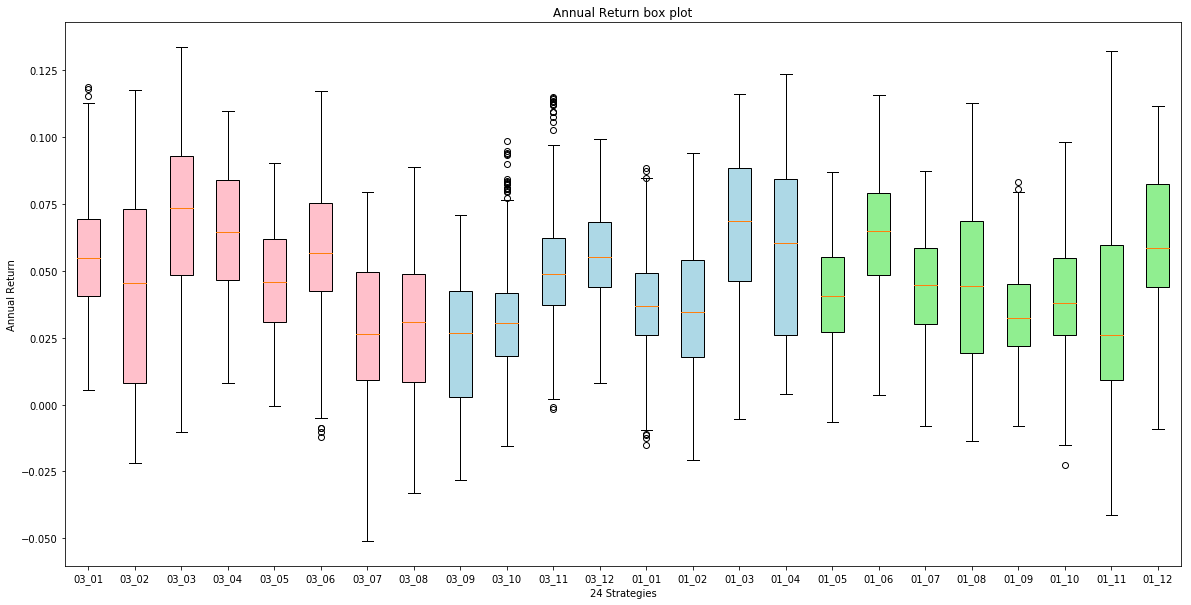

In [34]:
plot_box(AR_df, 'Annual Return')

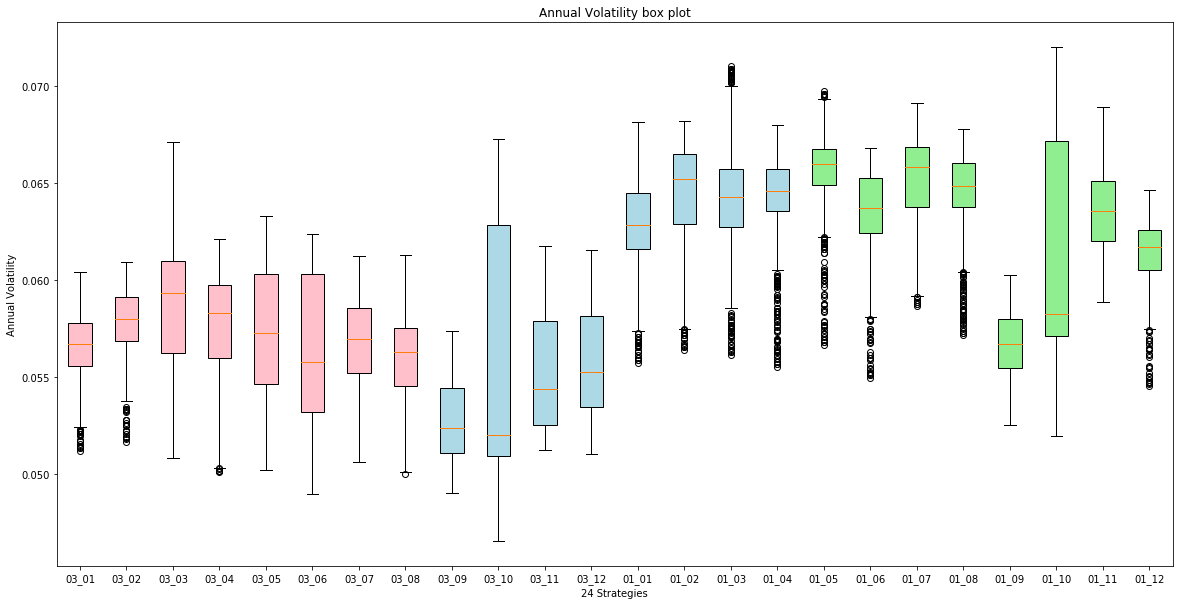

In [35]:
plot_box(AV_df, 'Annual Volatility')

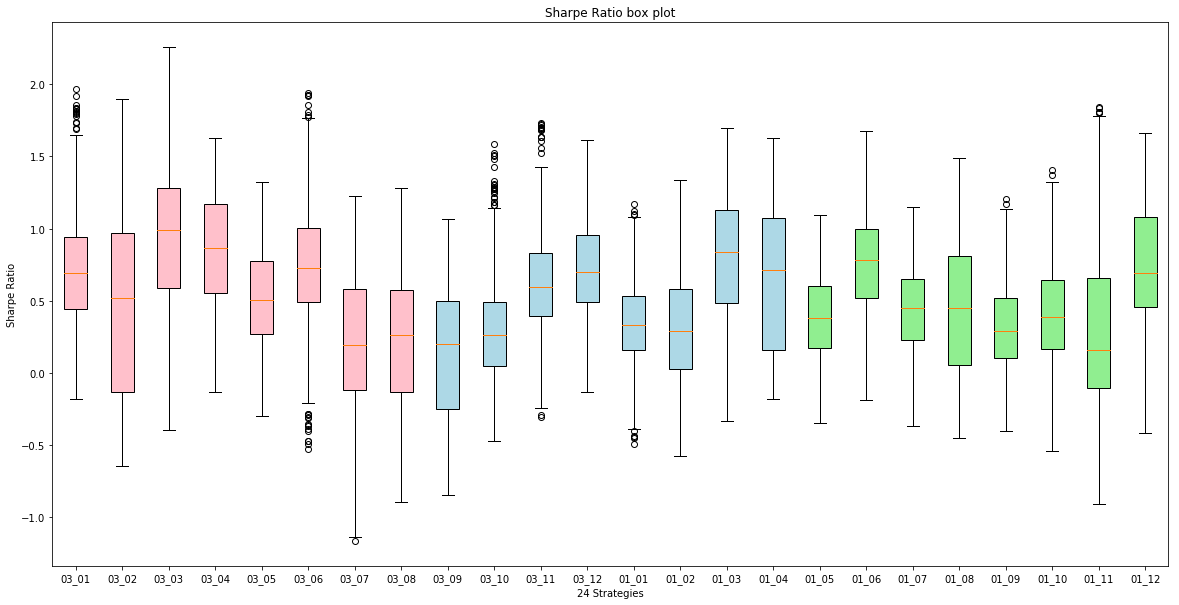

In [36]:
plot_box(SR_df, 'Sharpe Ratio')

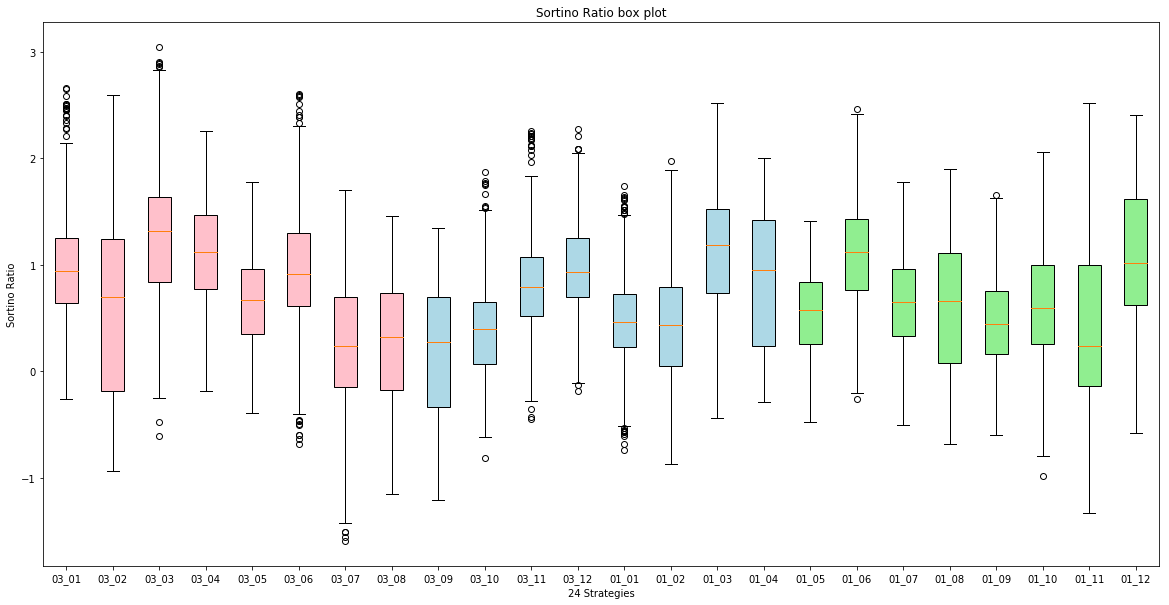

In [37]:
plot_box(ST_df, 'Sortino Ratio')

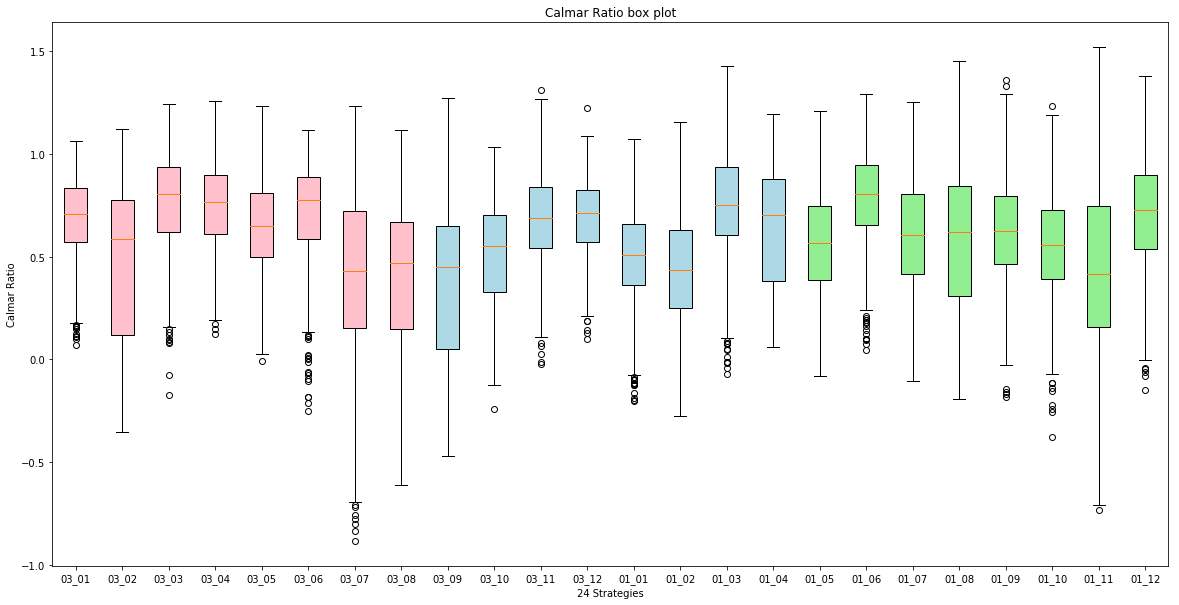

In [38]:
plot_box(CM_df, 'Calmar Ratio')

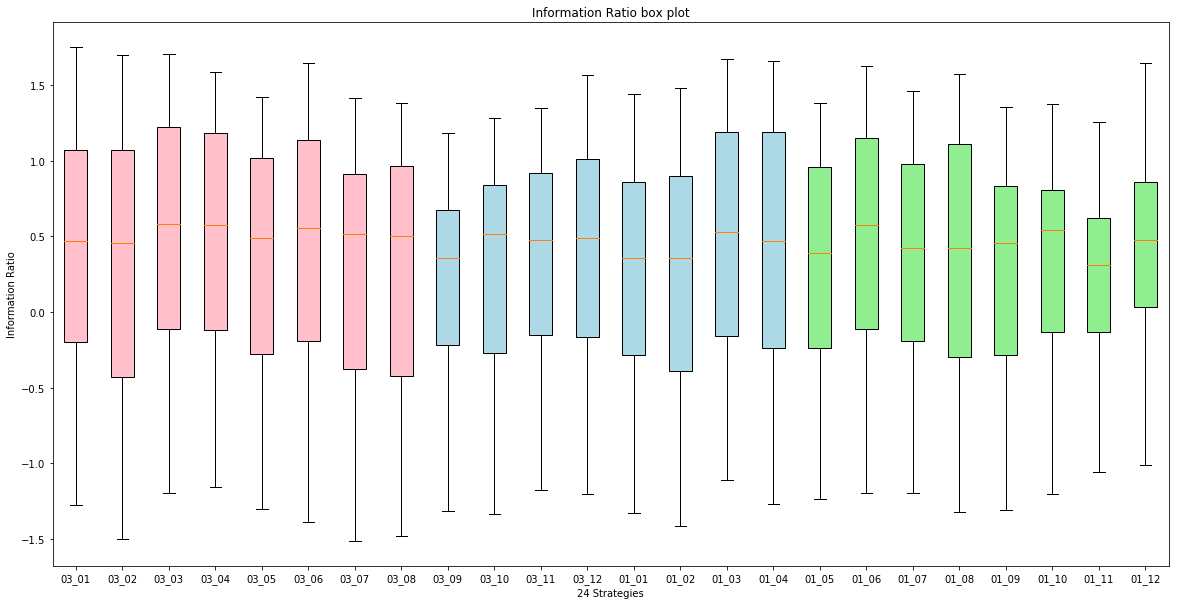

In [39]:
plot_box(ir_df, 'Information Ratio')

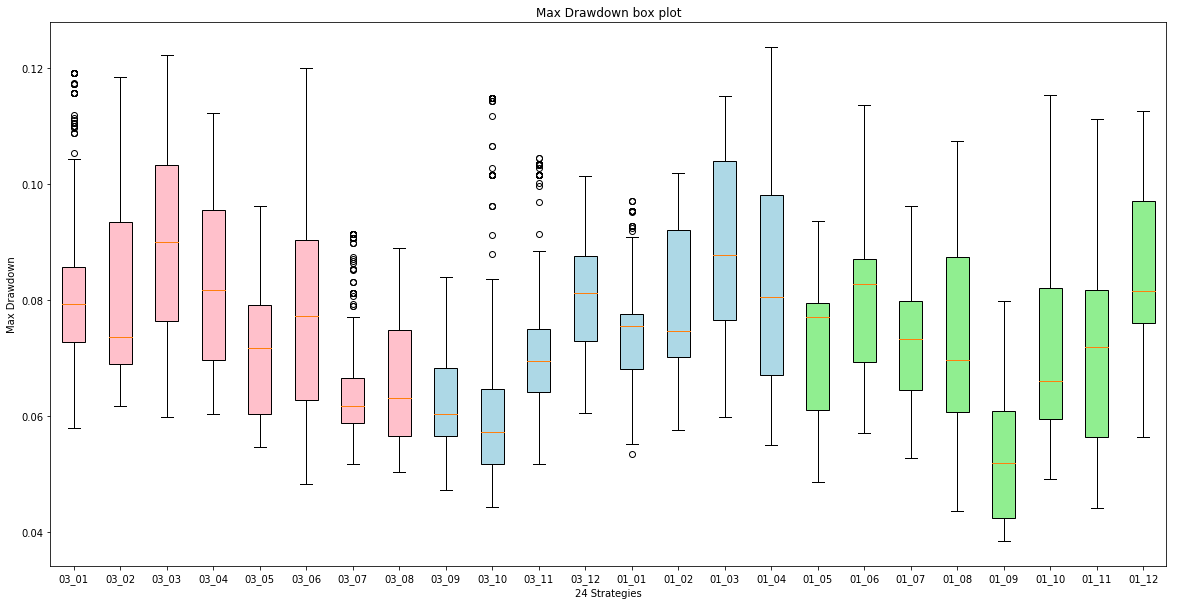

In [40]:
plot_box(MD_df, 'Max Drawdown')

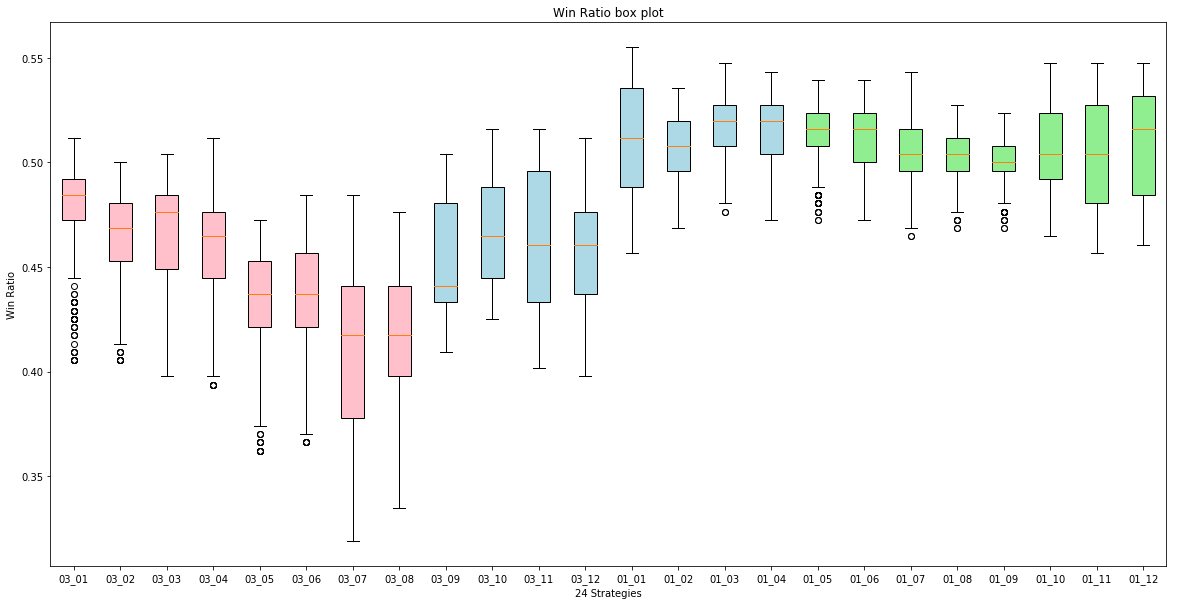

In [41]:
plot_box(WIN_df, 'Win Ratio')

In [42]:
def plot_box_new(result_df, stats_name):
    df_list = []
    for i in range(result_df.shape[1]):
        df_list.append(np.array(result_df.iloc[:,i]))
    
    fig = plt.figure(figsize=(15, 8))
    bplot = plt.boxplot(df_list, patch_artist = True, labels = result_df.columns)
    plt.title(stats_name + ' box plot')

    colors = ['pink', 'orange','yellow', 'lightgreen', 'lightblue']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)  

    plt.xlabel('5 Strategies')
    plt.ylabel(stats_name)
    plt.show()

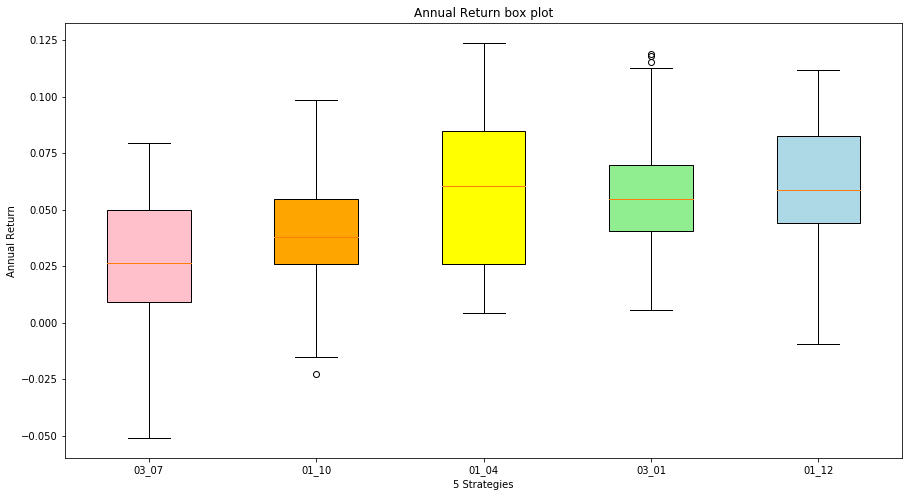

In [43]:
plot_box_new(AR_df[select], 'Annual Return')

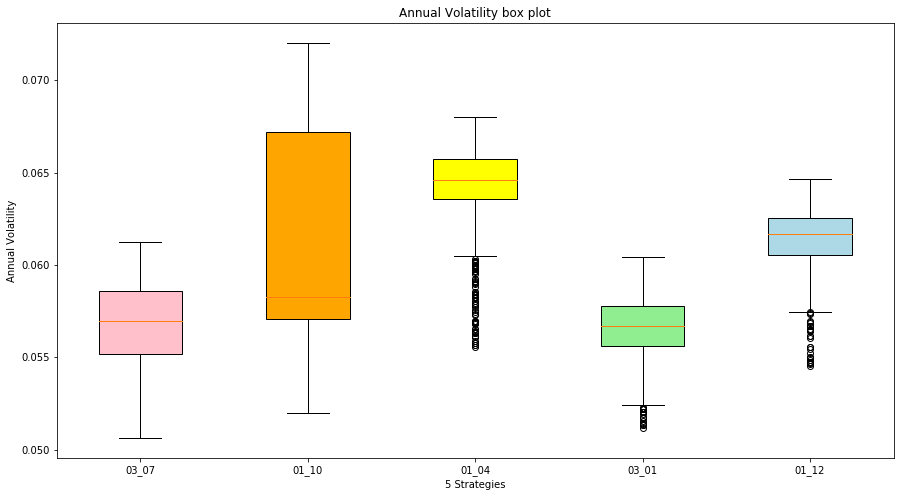

In [44]:
plot_box_new(AV_df[select], 'Annual Volatility')

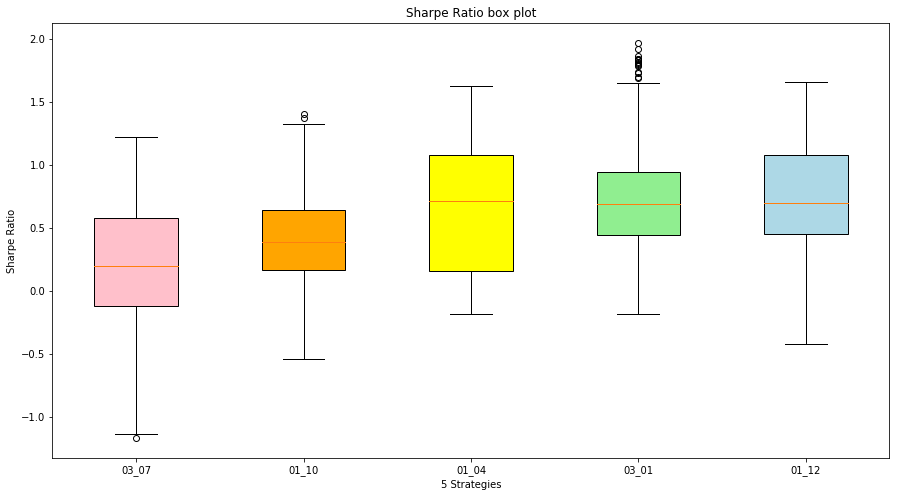

In [45]:
plot_box_new(SR_df[select], 'Sharpe Ratio')

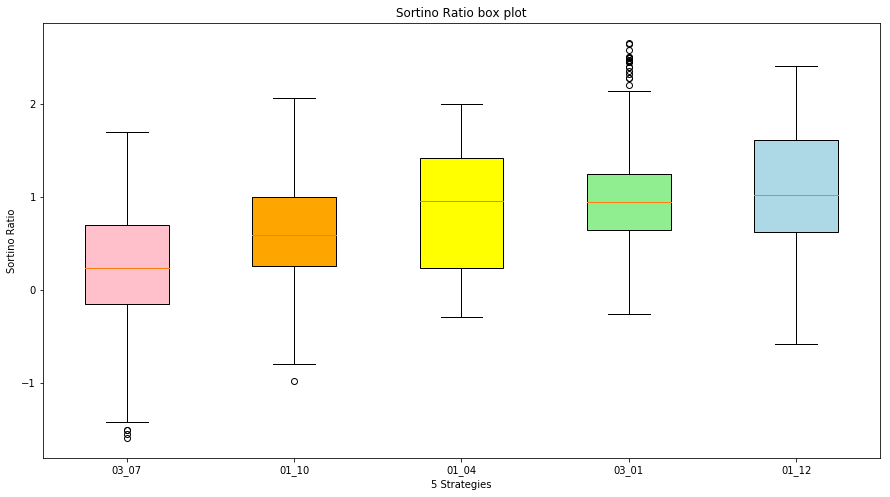

In [46]:
plot_box_new(ST_df[select], 'Sortino Ratio')

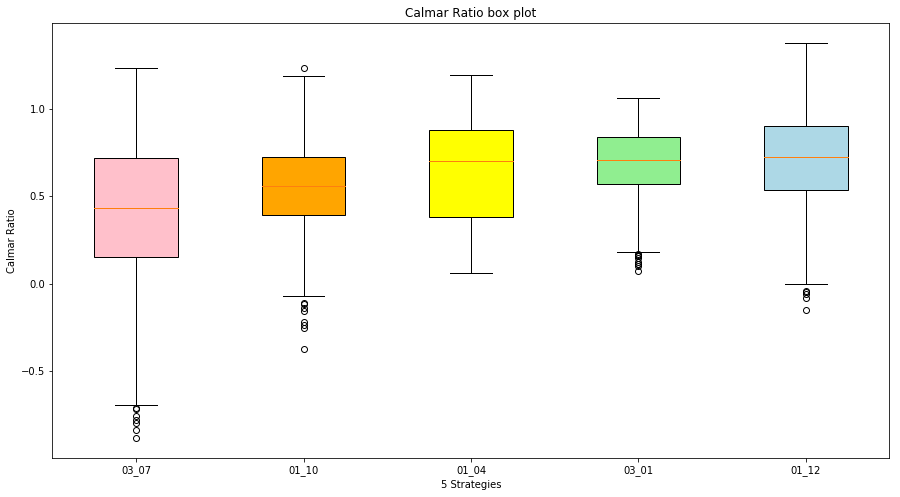

In [47]:
plot_box_new(CM_df[select], 'Calmar Ratio')

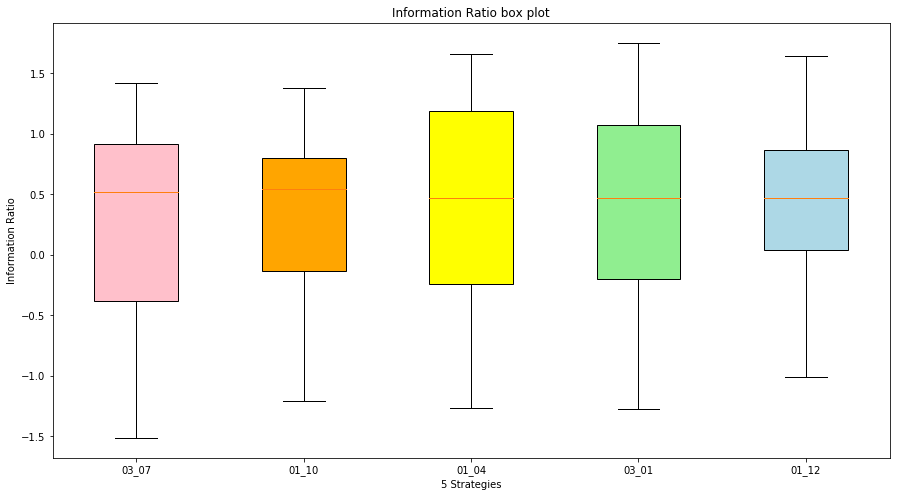

In [48]:
plot_box_new(ir_df[select], 'Information Ratio')

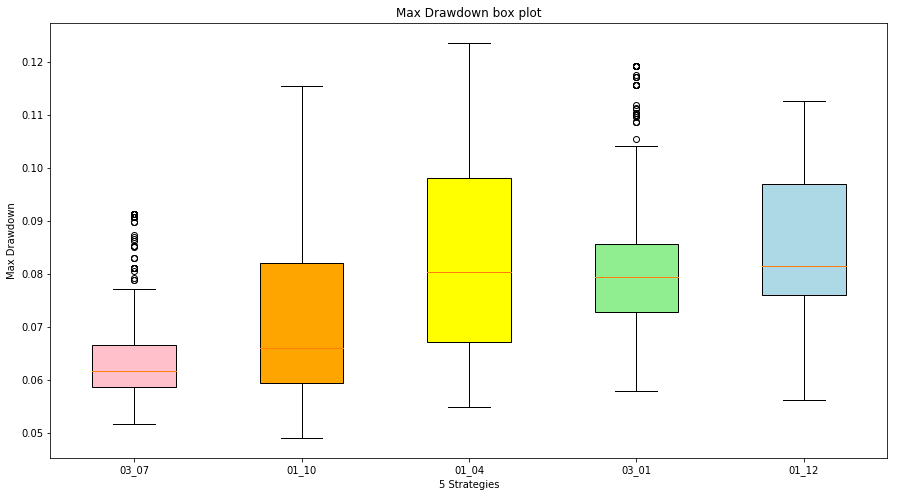

In [49]:
plot_box_new(MD_df[select], 'Max Drawdown')

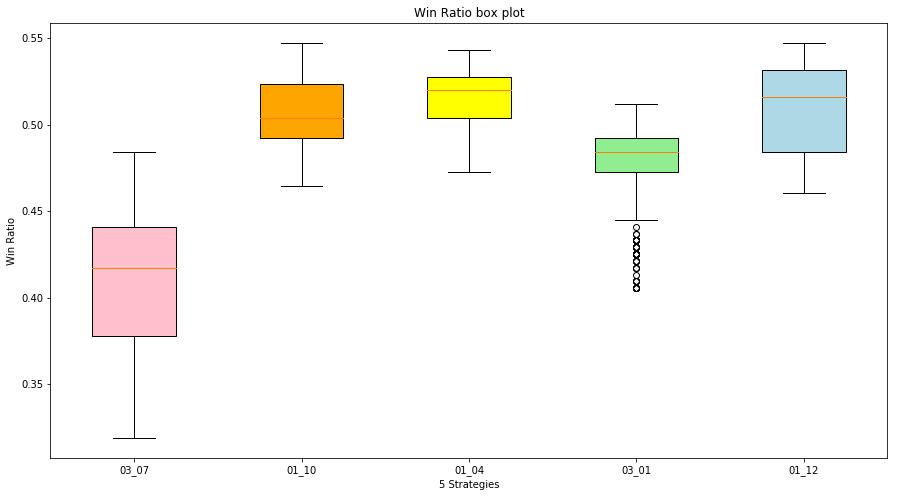

In [50]:
plot_box_new(WIN_df[select], 'Win Ratio')

In [51]:
cum_return_data[select].to_excel('cum_return_data.xlsx')

In [52]:
rep.loc[select].to_excel('rep.xlsx')